In [262]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import TomekLinks

In [263]:
df  = pd.read_csv('/Users/bianca/Documents/Itau-Analise-de-Credito/Inputs/credit_analysis_data.csv')

In [264]:
df.shape

(1000, 14)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1000 non-null   int64 
 1   Income                1000 non-null   int64 
 2   Loan Amount           1000 non-null   int64 
 3   Loan Term             1000 non-null   int64 
 4   Credit Score          1000 non-null   int64 
 5   Number of Defaults    1000 non-null   int64 
 6   Education Level       1000 non-null   object
 7   Employment Status     1000 non-null   object
 8   Marital Status        1000 non-null   object
 9   Number of Dependents  1000 non-null   int64 
 10  Home Ownership        1000 non-null   object
 11  Years in Residence    1000 non-null   int64 
 12  Annual Expenses       1000 non-null   int64 
 13  Default Probability   1000 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 109.5+ KB


In [266]:
df.head()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Education Level,Employment Status,Marital Status,Number of Dependents,Home Ownership,Years in Residence,Annual Expenses,Default Probability
0,56,25903,37269,47,761,3,PhD,Employed,Married,5,Rent,28,20629,1
1,69,53051,16003,54,312,0,Bachelor,Employed,Single,1,Mortgage,12,41678,0
2,46,38654,22246,48,683,3,Bachelor,Employed,Married,3,Own,7,20467,0
3,32,28666,29325,26,698,1,Bachelor,Employed,Married,1,Own,21,39952,0
4,60,40301,5816,39,318,2,PhD,Employed,Single,3,Own,20,29884,0


In [267]:
df.describe()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Number of Dependents,Years in Residence,Annual Expenses,Default Probability
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.81900,50863.121000,20203.059000,35.661000,578.81400,2.006000,2.548000,14.777000,30039.377000,0.197000
std,14.99103,14823.257362,9809.574573,13.686248,158.33446,1.418441,1.710152,8.606587,9864.135905,0.397931
min,18.00000,6556.000000,-10195.000000,12.000000,300.00000,0.000000,0.000000,0.000000,-2173.000000,0.000000
25%,31.00000,40822.250000,13585.000000,24.000000,443.00000,1.000000,1.000000,7.000000,22985.000000,0.000000
50%,44.00000,50807.000000,20038.000000,35.000000,582.00000,2.000000,3.000000,15.000000,30190.000000,0.000000
75%,56.00000,60281.750000,26842.000000,48.000000,722.00000,3.000000,4.000000,23.000000,36921.750000,0.000000
max,69.00000,89485.000000,51931.000000,59.000000,849.00000,4.000000,5.000000,29.000000,57345.000000,1.000000


In [268]:
#Verifica se há valores nulos
df.isnull().sum()

Age                     0
Income                  0
Loan Amount             0
Loan Term               0
Credit Score            0
Number of Defaults      0
Education Level         0
Employment Status       0
Marital Status          0
Number of Dependents    0
Home Ownership          0
Years in Residence      0
Annual Expenses         0
Default Probability     0
dtype: int64

In [269]:
#Verifica se há duplicados
df.duplicated().sum()

np.int64(0)

In [270]:
#Verifica quantos valores distintos há em cada coluna
df.nunique()

Age                      52
Income                  994
Loan Amount             987
Loan Term                48
Credit Score            458
Number of Defaults        5
Education Level           4
Employment Status         3
Marital Status            4
Number of Dependents      6
Home Ownership            3
Years in Residence       30
Annual Expenses         988
Default Probability       2
dtype: int64

In [271]:
from sklearn.preprocessing import LabelEncoder

In [272]:
#Transformação de Variáveris categóricas em numérica
label_encoder = LabelEncoder()
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
df['Employment Status'] = label_encoder.fit_transform(df['Employment Status'])
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status']) 
df['Home Ownership'] = label_encoder.fit_transform(df['Home Ownership']) 


In [273]:
# verifica o balanceamento das classes
#Conclusão: classe desbalanceada. 

df['Default Probability'].value_counts()

Default Probability
0    803
1    197
Name: count, dtype: int64

## Analise Exploratoria

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

In [275]:
sns.set(font_scale=1.3)
sns.set(rc={'figure.figsize': (20, 20)})

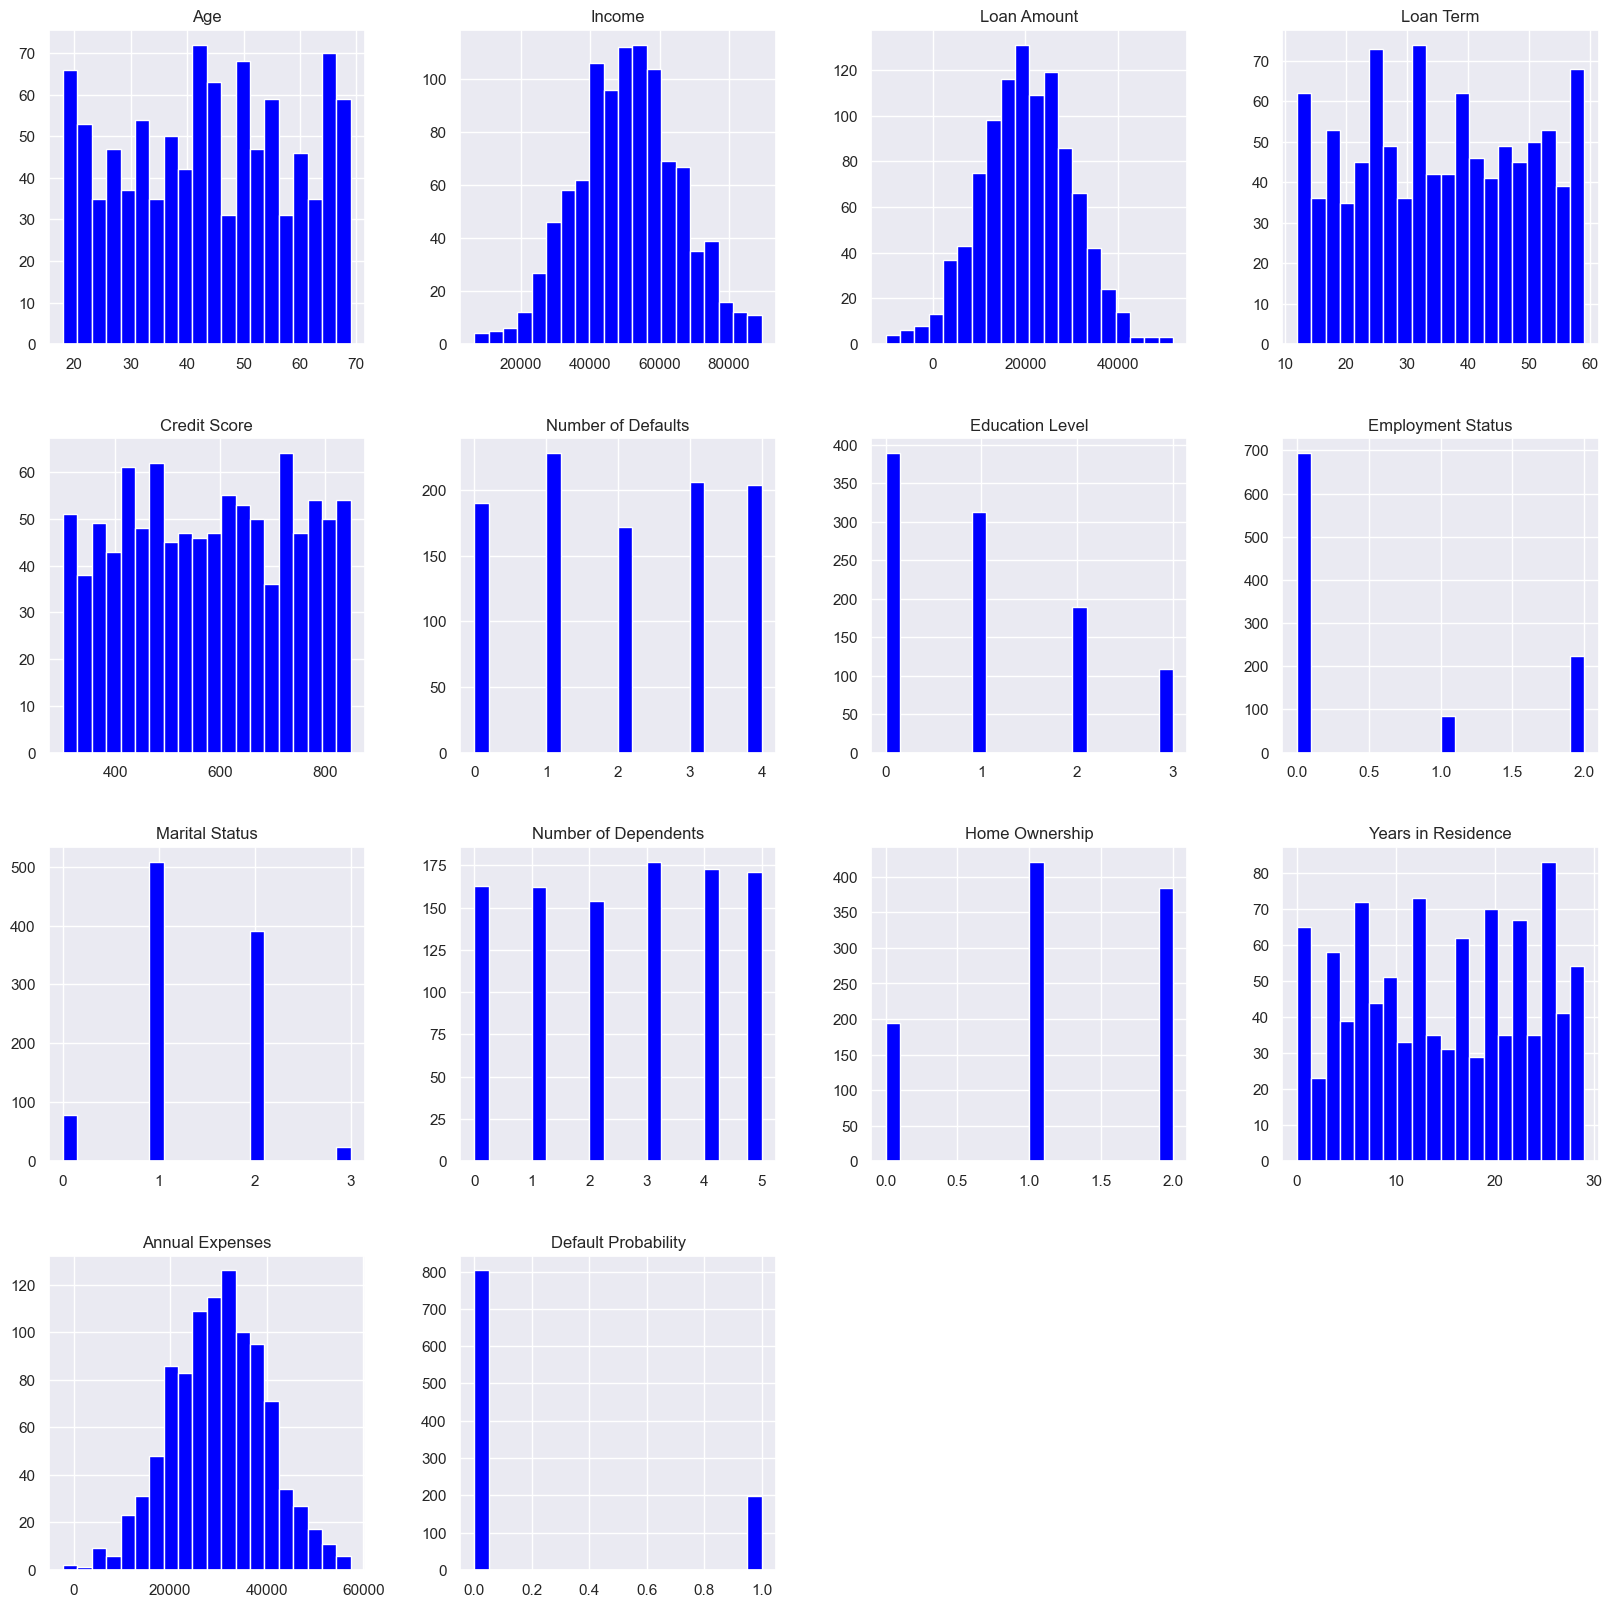

In [276]:
eixo = df.hist(bins=20, color='blue')
plt.show()

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   1000 non-null   int64
 1   Income                1000 non-null   int64
 2   Loan Amount           1000 non-null   int64
 3   Loan Term             1000 non-null   int64
 4   Credit Score          1000 non-null   int64
 5   Number of Defaults    1000 non-null   int64
 6   Education Level       1000 non-null   int64
 7   Employment Status     1000 non-null   int64
 8   Marital Status        1000 non-null   int64
 9   Number of Dependents  1000 non-null   int64
 10  Home Ownership        1000 non-null   int64
 11  Years in Residence    1000 non-null   int64
 12  Annual Expenses       1000 non-null   int64
 13  Default Probability   1000 non-null   int64
dtypes: int64(14)
memory usage: 109.5 KB


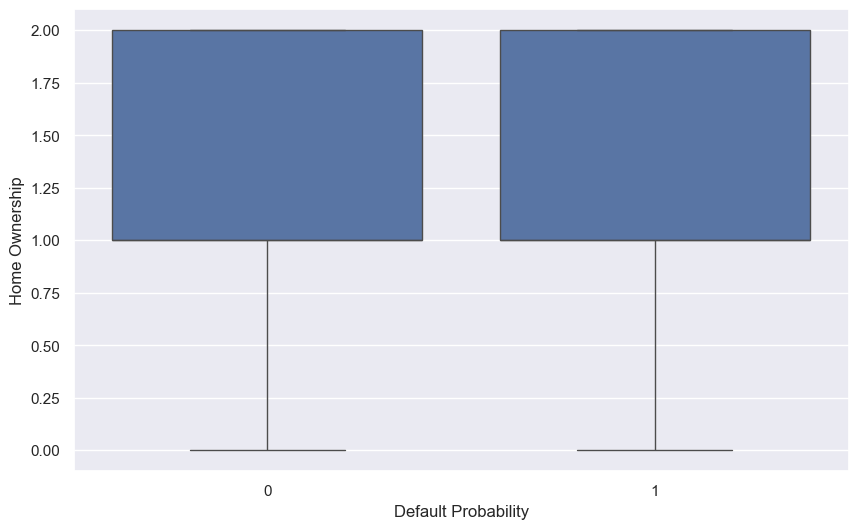

In [278]:
plt.figure(figsize=(10, 6))
sns.boxplot(data= df, x = 'Default Probability', y = 'Home Ownership'); #Income

## Transforçaão de Variaveis Categoricas

In [279]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [280]:
## LabelEncoder : codificação ordinal (quando a ordem das categorias importa).
# OneHotEncoder : codificação nominal (quando a ordem das categorias não importa).

In [281]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   1000 non-null   int64
 1   Income                1000 non-null   int64
 2   Loan Amount           1000 non-null   int64
 3   Loan Term             1000 non-null   int64
 4   Credit Score          1000 non-null   int64
 5   Number of Defaults    1000 non-null   int64
 6   Education Level       1000 non-null   int64
 7   Employment Status     1000 non-null   int64
 8   Marital Status        1000 non-null   int64
 9   Number of Dependents  1000 non-null   int64
 10  Home Ownership        1000 non-null   int64
 11  Years in Residence    1000 non-null   int64
 12  Annual Expenses       1000 non-null   int64
 13  Default Probability   1000 non-null   int64
dtypes: int64(14)
memory usage: 109.5 KB


In [282]:
# Transformando variáveis categóricas
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['Education Level', 'Employment Status', 'Marital Status', 'Home Ownership'])
    ],
    remainder='passthrough'
)

In [283]:
df_encoded = encoder.fit_transform(df)

In [284]:
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out())

In [285]:
#df_encoded.isnull().sum()
df_encoded

,cat__Education Level_1,cat__Education Level_2,cat__Education Level_3,cat__Employment Status_1,cat__Employment Status_2,cat__Marital Status_1,cat__Marital Status_2,cat__Marital Status_3,cat__Home Ownership_1,cat__Home Ownership_2,remainder__Age,remainder__Income,remainder__Loan Amount,remainder__Loan Term,remainder__Credit Score,remainder__Number of Defaults,remainder__Number of Dependents,remainder__Years in Residence,remainder__Annual Expenses,remainder__Default Probability
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,56.0,25903.0,37269.0,47.0,761.0,3.0,5.0,28.0,20629.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,53051.0,16003.0,54.0,312.0,0.0,1.0,12.0,41678.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,46.0,38654.0,22246.0,48.0,683.0,3.0,3.0,7.0,20467.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,32.0,28666.0,29325.0,26.0,698.0,1.0,1.0,21.0,39952.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60.0,40301.0,5816.0,39.0,318.0,2.0,3.0,20.0,29884.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,60.0,56292.0,34532.0,17.0,445.0,4.0,5.0,15.0,27646.0,0.0
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,64.0,36687.0,6613.0,29.0,595.0,2.0,1.0,8.0,27514.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,62.0,43438.0,26929.0,15.0,769.0,4.0,2.0,20.0,36041.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,35.0,60835.0,13941.0,28.0,805.0,3.0,3.0,24.0,40194.0,1.0


## Separação classe e atributos

In [286]:
#X = df.iloc[:, 0:12].values
X = df_encoded.iloc[:, 0:18].values
X.shape

(1000, 18)

In [287]:
#y = df.iloc[:, 13].values
y = df_encoded.iloc[:, 19].values
y.shape

(1000,)

In [288]:
np.unique(y, return_counts=True)

(array([0., 1.]), array([803, 197]))

## Baleanceamento das classes

In [289]:
# Método de undersampling - Tomek links
tl = TomekLinks(sampling_strategy = 'auto')
X_tl, y_tl = tl.fit_resample(X,y)

In [290]:
np.unique(y_tl, return_counts=True)

(array([0., 1.]), array([704, 197]))

In [291]:
# Método de oversampling - SMOTE
from imblearn.over_sampling import SMOTE

In [292]:

smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X, y)

In [293]:
np.unique(y_smote, return_counts=True)

(array([0., 1.]), array([803, 803]))

## TREINAMENTO DO MODELO 

Sem Balanceamento

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [295]:
# Dividindo bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [296]:
x_train.shape, x_test.shape

((800, 18), (200, 18))

In [297]:
from sklearn.preprocessing import StandardScaler

In [298]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [299]:
# Treinando modelo com dados desbalanceados
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train, y_train)


LogisticRegression()

VER SE PRECISA FAZER NORMALIZAÇÃO DOS DADOS
ENTENDER O QUE É StandardScaler

In [300]:
# Aplicando previsões aos dados de teste
y_pred = regressao_logistica.predict(x_test)


In [301]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)


Acurácia: 0.82
Matriz de Confusão:
 [[164   0]
 [ 36   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       164
         1.0       0.00      0.00      0.00        36

    accuracy                           0.82       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.67      0.82      0.74       200



C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

## TREINAMENTO DO MODELO TOMEK LINK

In [302]:
# Dividindo bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_tl,y_tl, test_size= 0.2)

In [303]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [304]:
# Treinando modelo com dados desbalanceados
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train, y_train)

LogisticRegression()

In [305]:
y_pred_tl = regressao_logistica.predict(x_test)

In [306]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred_tl)
conf_matrix = confusion_matrix(y_test, y_pred_tl)
class_report = classification_report(y_test, y_pred_tl)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.7790055248618785
Matriz de Confusão:
 [[141   0]
 [ 40   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88       141
         1.0       0.00      0.00      0.00        40

    accuracy                           0.78       181
   macro avg       0.39      0.50      0.44       181
weighted avg       0.61      0.78      0.68       181



C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

## TREINAMENTO SMOTE

In [307]:
# Dividindo bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size= 0.2)

In [308]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [309]:
x_test

array([[-0.71614861,  2.22554581, -0.36469679, ..., -0.74404074,
        -0.64945083, -0.09125394],
       [ 1.59706068, -0.5061614 , -0.36469679, ...,  0.77912137,
        -0.33898322,  0.91586022],
       [ 1.59706068, -0.5061614 , -0.36469679, ...,  0.210635  ,
         0.05615565,  0.53602364],
       ...,
       [-0.71614861,  0.02596754, -0.36469679, ..., -0.44392878,
        -1.47893481, -0.44007944],
       [-0.71614861,  2.22554581, -0.36469679, ...,  0.01965421,
        -0.9704644 , -0.860184  ],
       [-0.71614861, -0.5061614 , -0.36469679, ..., -1.49928011,
        -0.33898322,  1.67702202]])

In [310]:
# Treinando modelo com dados desbalanceados
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train, y_train)

LogisticRegression()

In [311]:
y_pred_smote = regressao_logistica.predict(x_test)

In [312]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred_smote)
conf_matrix = confusion_matrix(y_test, y_pred_smote)
class_report = classification_report(y_test, y_pred_smote)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.5683229813664596
Matriz de Confusão:
 [[ 76  80]
 [ 59 107]]
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.56      0.49      0.52       156
         1.0       0.57      0.64      0.61       166

    accuracy                           0.57       322
   macro avg       0.57      0.57      0.56       322
weighted avg       0.57      0.57      0.57       322



In [322]:
column_names = df.columns
column_names

Index(['Age', 'Income', 'Loan Amount', 'Loan Term', 'Credit Score',
       'Number of Defaults', 'Education Level', 'Employment Status',
       'Marital Status', 'Number of Dependents', 'Home Ownership',
       'Years in Residence', 'Annual Expenses', 'Default Probability'],
      dtype='object')

In [317]:
print("Número de colunas em x_train:", x_train.shape[1])
print("Número de coeficientes:", regressao_logistica.coef_.shape[1])

Número de colunas em x_train: 18
Número de coeficientes: 18


In [320]:
coefficients = pd.Series(regressao_logistica.coef_[0], index=column_names)

ValueError: Length of values (18) does not match length of index (14)

## Tuning de Hiperparâmetros

In [206]:
from sklearn.model_selection import GridSearchCV

In [209]:
grid_search = GridSearchCV(regressao_logistica, param_grid, cv=5, scoring='accuracy')

NameError: name 'param_grid' is not defined